## 1 Ano de dados

In [35]:
url = "http://vps-40d69db1.vps.ovh.ca:23002/api/CotacaoIntradayAcaoResultadoValors/obtemDatasPorDataGrupoLimite?diaInicioNum=20210301&diaFinalNum=20220228&grupoAcaoId=12&limiteDiaRegra=260"

In [36]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [37]:
r = requests.get(url)
j = r.json()
df = pd.DataFrame.from_dict(j)

In [38]:
df.head()

,anoMesNum,ticker,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,mediaDias
0,202103,ABEV3,t09s15vy,0.09,0.15,0,345,41.9449
1,202103,ABEV3,t10s15vy,0.10,0.15,0,345,41.9449
2,202103,ABEV3,t10s17vy,0.10,0.17,0,345,47.0261
3,202103,ABEV3,t12s15vy,0.12,0.15,0,345,41.9449
4,202103,ABEV3,t12s17vy,0.12,0.17,0,345,47.0261


## Cálculo de Saldo

In [39]:
df['saldo'] =(df['target'] * df['totalLucro']) - (df['stop'] * df['totalPrejuizo'])

In [40]:
df.head()

,anoMesNum,ticker,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,mediaDias,saldo
0,202103,ABEV3,t09s15vy,0.09,0.15,0,345,41.9449,-51.75
1,202103,ABEV3,t10s15vy,0.10,0.15,0,345,41.9449,-51.75
2,202103,ABEV3,t10s17vy,0.10,0.17,0,345,47.0261,-58.65
3,202103,ABEV3,t12s15vy,0.12,0.15,0,345,41.9449,-51.75
4,202103,ABEV3,t12s17vy,0.12,0.17,0,345,47.0261,-58.65


In [41]:
dfABEV = df[df['ticker'] == 'ABEV3']

In [42]:
dfABEV

,anoMesNum,ticker,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,mediaDias,saldo
0,202103,ABEV3,t09s15vy,0.09,0.15,0,345,41.9449,-51.75
1,202103,ABEV3,t10s15vy,0.10,0.15,0,345,41.9449,-51.75
2,202103,ABEV3,t10s17vy,0.10,0.17,0,345,47.0261,-58.65
3,202103,ABEV3,t12s15vy,0.12,0.15,0,345,41.9449,-51.75
4,202103,ABEV3,t12s17vy,0.12,0.17,0,345,47.0261,-58.65
...,...,...,...,...,...,...,...,...,...
8871,202202,ABEV3,t12s17vy,0.12,0.17,49,0,10.9388,5.88
8872,202202,ABEV3,t13s17vy,0.13,0.17,53,0,14.1321,6.89
8873,202202,ABEV3,t14s17vy,0.14,0.17,19,0,13.5263,2.66
8874,202202,ABEV3,t15s12vy,0.15,0.12,8,0,13.0000,1.20


In [43]:
dfAgrupado = df\
        .groupby(['anoMesNum','codigoRegraProjecao','target','stop']).sum(['totalLucro','totalPrejuizo'])\
        .filter(items=['totalLucro','totalPrejuizo'])

In [44]:
dfAgrupado = dfAgrupado.reset_index()

In [45]:
dfAgrupado['saldo'] =(dfAgrupado['target'] * dfAgrupado['totalLucro']) - (dfAgrupado['stop'] * dfAgrupado['totalPrejuizo'])

In [46]:
dfAgrupado['total'] = dfAgrupado['totalLucro'] + dfAgrupado['totalPrejuizo']

In [47]:
dfAgrupado.head()

,anoMesNum,codigoRegraProjecao,target,stop,totalLucro,totalPrejuizo,saldo,total
0,202103,t09s15vy,0.09,0.15,12308,18958,-1735.98,31266
1,202103,t10s15vy,0.10,0.15,11571,19637,-1788.45,31208
2,202103,t10s17vy,0.10,0.17,12564,18625,-1909.85,31189
3,202103,t12s15vy,0.12,0.15,10308,20700,-1868.04,31008
4,202103,t12s17vy,0.12,0.17,11295,19571,-1971.67,30866


In [48]:
dfMelhores = df\
            .filter(items=['codigoRegraProjecao','saldo'])\
            .groupby('codigoRegraProjecao').agg({'saldo' : np.sum })

In [49]:
dfMelhores.sort_values('saldo')

,saldo
codigoRegraProjecao,
t09s15vy,5169.63
t10s15vy,5733.95
t12s15vy,6357.69
t15s12vy,6406.95
t10s17vy,6665.06
t12s17vy,7895.28
t15s15vy,8006.85
t13s17vy,8584.74
t14s17vy,9082.72


# Visualização dos Melhores Casos

In [65]:
dfTop5 = dfAgrupado\
        .filter(items=['anoMesNum','codigoRegraProjecao','saldo'])
dfTop5 = dfTop5[(dfTop5['codigoRegraProjecao']=='t10s17vy') | (dfTop5['codigoRegraProjecao']=='t12s17vy')  
       | (dfTop5['codigoRegraProjecao']=='t14s17vy')]
dfTop5 =dfTop5.set_index(['anoMesNum','codigoRegraProjecao'])

In [66]:
dfTop5.head()

saldo
anoMesNum codigoRegraProjecao         
202103    t10s17vy            -1909.85
          t12s17vy            -1971.67
          t14s17vy            -1992.08
202104    t10s17vy             -615.85
          t12s17vy             -603.62

<AxesSubplot:xlabel='anoMesNum,codigoRegraProjecao'>

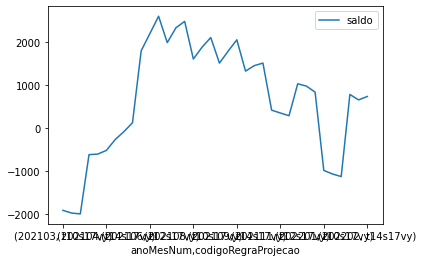

In [67]:
dfTop5.plot()

<AxesSubplot:xlabel='anoMesNum'>

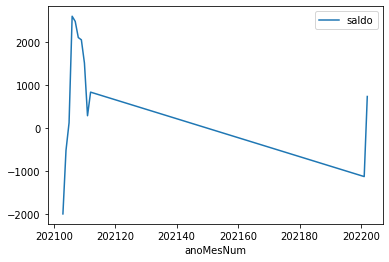

In [68]:
dfTop1 = dfAgrupado[(dfAgrupado['codigoRegraProjecao']=='t14s17vy')]
dfTop1 = dfTop1\
        .filter(items=['anoMesNum','saldo'])

dfTop1 =dfTop1.set_index(['anoMesNum'])
dfTop1.plot()

In [69]:
dfTop1.head(20)

,saldo
anoMesNum,
202103,-1992.08
202104,-517.37
202105,124.53
202106,2596.92
202107,2477.71
202108,2102.52
202109,2049.50
202110,1509.91
202111,287.40
